<a href="https://colab.research.google.com/github/yunisindhu/Robusters/blob/master/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import datasets, linear_model
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Heart.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Converting AHD into Binary 

In [ ]:
AHD_map = {'Yes': 1, 'No': 0}
df['AHD'] = df['AHD'].map(AHD_map)

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [ ]:
count_nan = df['Thal'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 2


In [ ]:
df['Thal'] = df['Thal'].replace(np.nan, 0)

In [ ]:
count_nan = df['Ca'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 4


In [ ]:
df['Ca'] = df['Ca'].replace(np.nan, 0)

In [ ]:
count_nan = df['Ca'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 0


In [ ]:
df.AHD.value_counts()

0    164
1    139
Name: AHD, dtype: int64

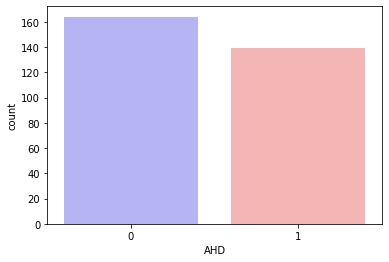

In [ ]:
sns.countplot(x="AHD", data=df, palette="bwr")
plt.show()

In [ ]:
countNoDisease = len(df[df.AHD == 0])
countHaveDisease = len(df[df.AHD == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.AHD))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.AHD))*100)))

Percentage of Patients Haven't Heart Disease: 54.13%
Percentage of Patients Have Heart Disease: 45.87%


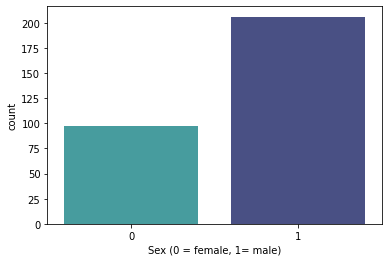

In [ ]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


In [ ]:
df.groupby('AHD').mean()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
AHD,,,,,,,,,,,,
0,148.073171,52.585366,0.560976,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.268293
1,156.633094,56.625899,0.820144,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.129496


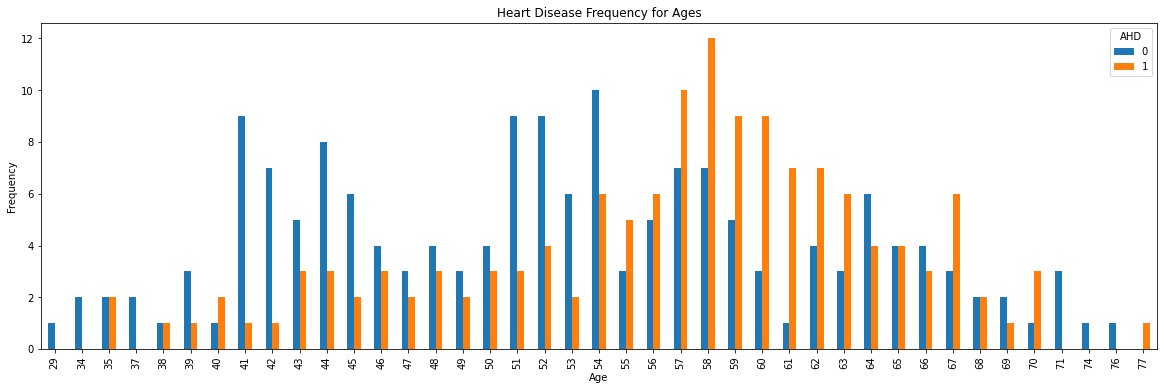

In [ ]:
pd.crosstab(df.Age,df.AHD).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

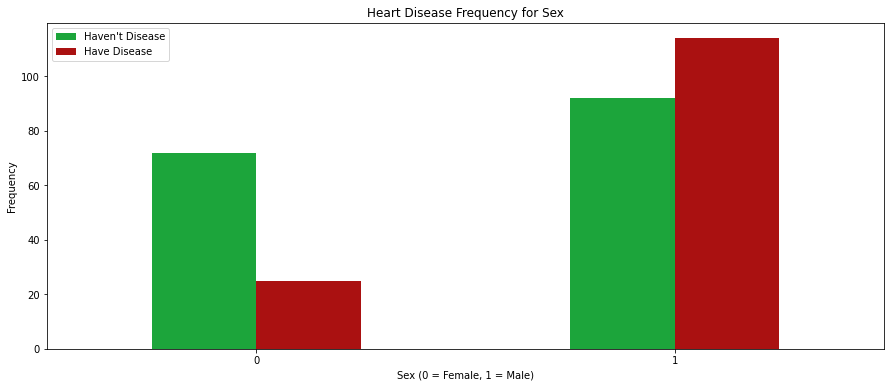

In [ ]:
pd.crosstab(df.Sex,df.AHD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

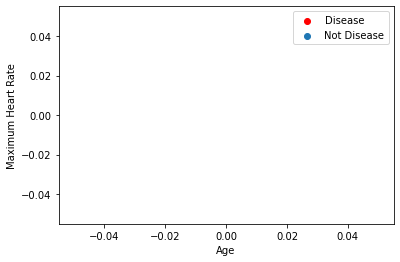

In [ ]:
plt.scatter(x=df.Age[df.AHD=="Yes"], y=df.MaxHR[(df.AHD=="Yes")], c="red")
plt.scatter(x=df.Age[df.AHD=="No"], y=df.MaxHR[(df.AHD=="No")])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

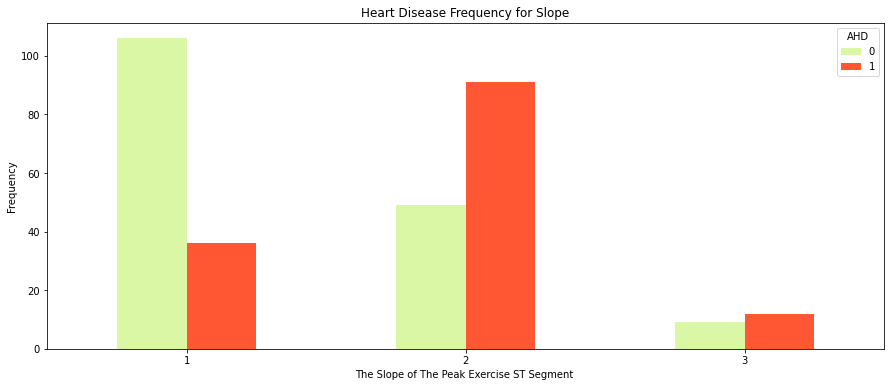

In [ ]:
pd.crosstab(df.Slope,df.AHD).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

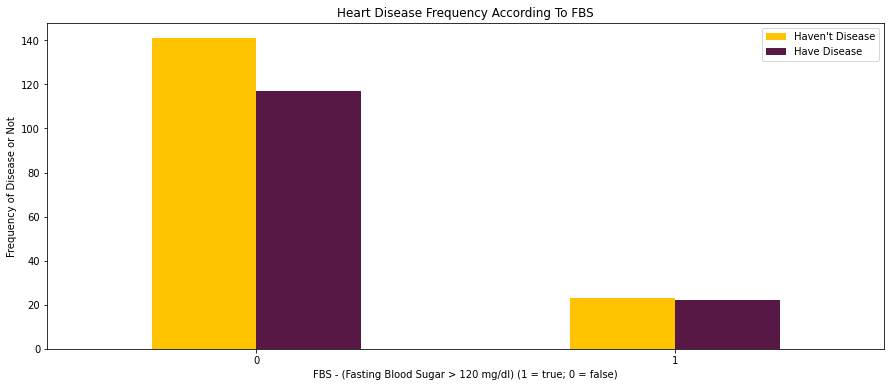

In [ ]:
pd.crosstab(df.Fbs,df.AHD).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

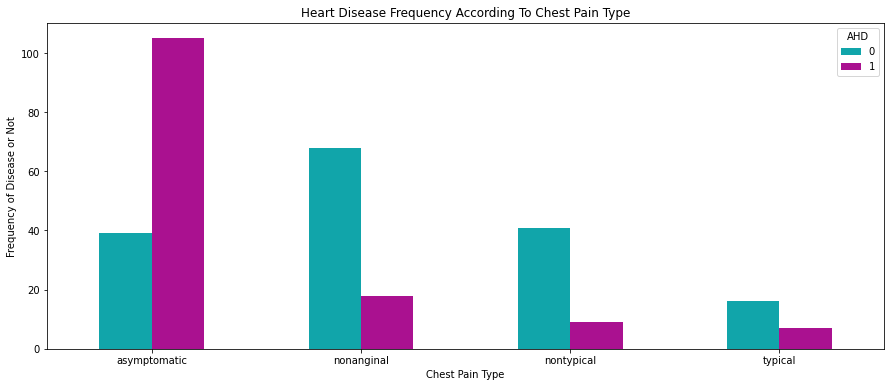

In [ ]:
pd.crosstab(df.ChestPain,df.AHD).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Creating Dummy Variables

In [ ]:
a = pd.get_dummies(df['ChestPain'], prefix = "ChestPain")
b = pd.get_dummies(df['Thal'], prefix = "Thal")
c = pd.get_dummies(df['Slope'], prefix = "Slope")

#Creating Model for Logistic Regression

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
df = df.drop(columns = ['ChestPain', 'Thal', 'Slope'])
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,145,233,1,2,150,0,2.3,0.0,0,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,160,286,0,2,108,1,1.5,3.0,1,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2.0,1,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,130,250,0,0,187,0,3.5,0.0,0,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,130,204,0,2,172,0,1.4,0.0,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
y = df.AHD.values
x_data = df.drop(['AHD'], axis = 1)

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

Split data - 80% of the data will be train data and 20% of it will be test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

**SIGMOID FUNCTION**


In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

**Forward and Backward Propagation,Cost Function,Gradient Descent**

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

**Default Logistic Regression**

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3219763348781192


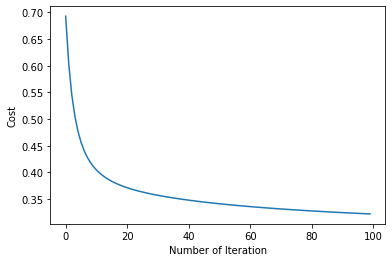

Manuel Test Accuracy: 78.69%


In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [ ]:
model_LR= LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prob = model_LR.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(x_test, y_pred)

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [ ]:
#train the classifier
logistic_clf.fit(x_train,y_train)

logistic_clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
#make predictions
logistic_predict = logistic_clf.predict(x_test)

In [ ]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 83.52%


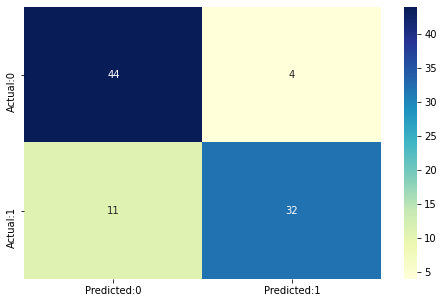

In [ ]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

**Tuned Model of Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [ ]:
data.corr()

NameError: ignored

**10-fold cross validation over the training set (80%)**

In [ ]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(LR.best_params_)

{'C': 10, 'penalty': 'l2'}


In [ ]:
y_prob = LR.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(x_test, y_pred)


1.0

**Logistic Regression with L2 Regularization**

In [ ]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prob = LR_ridge.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(x_test, y_pred)

1.0

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5103906624640204


## Confusion Matrix for Logistic Regression

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[42,  6],
       [11, 32]])


#Precision, recall, F1 and accuracy scores for Logistic Regression#




In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, logistic_predict)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, logistic_predict)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, logistic_predict)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, logistic_predict
              )
print('F1 score: %f' % f1)

Accuracy: 0.835165
Precision: 0.888889
Recall: 0.744186
F1 score: 0.810127


In [ ]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        48
           1       0.89      0.74      0.81        43

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



**Scores in Percent**

In [ ]:
logistic_accuracy = accuracy_score(y_test, logistic_predict)
print(f'The accuracy score for logistic regression is {round(logistic_accuracy*100,2)}%')
logistic_precision = precision_score(y_test, logistic_predict)
print(f'The precision score for logistic regression is {round(logistic_precision*100,2)}%')
logistic_recall = recall_score(y_test, logistic_predict)
print(f'The recall score for logistic regression is {round(logistic_recall*100,2)}%')
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The accuracy score for logistic regression is 83.52%
The precision score for logistic regression is 88.89%
The recall score for logistic regression is 74.42%
The f1 score for logistic regression is 81.01%


#Linear Discriminant Analysis

In [ ]:
def prdict_date(algo_name,x_train,y_train,x_test,y_test,atype='',verbose=0):
    algo_name.fit(x_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(x_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(x_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [ ]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train.T,y_train)



LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
model = LinearDiscriminantAnalysis()
# evaluate model
scores = cross_val_score(model,X=x_train.T, y=y_train.T, scoring='accuracy', cv=10, n_jobs=-1 )
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.835 (0.072)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
accuracies = {}
acc = lda.score(x_test,y_test)*100
accuracies['Linear Discriminant'] = acc
print("Accuracy of Linear Discriminant: {:.2f}%".format(acc))

Accuracy of Linear Discriminant: 85.71%


In [ ]:
lda.explained_variance_ratio_



array([1.])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_knn = cross_val_score(estimator=knn, X=x_train.T, y=y_train.T, cv=10)


NameError: ignored

In [ ]:
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

KNN Average accuracy:  0.7608333333333333
KNN Standart Deviation:  0.08873258827636112


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 74.73%


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(8, knn.score(x_test, y_test)*100))

8 NN Score: 75.82%


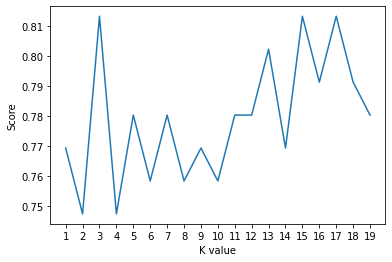

Maximum KNN Score is 81.32%


In [ ]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_prob = model_naive.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(x_test, y_pred)

1.0

In [ ]:
print("Number of mislabeled points from %d points : %d"
      % (x_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 91 points : 15


In [ ]:
scores = cross_val_score(model_naive, x, y, cv=10, scoring='accuracy')
print(scores)

[0.83870968 0.74193548 0.74193548 0.9        0.83333333 0.8
 0.86666667 0.83333333 0.56666667 0.9       ]


In [ ]:
scores.mean()

0.8022580645161291

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train)
accuracies = {}
acc = nb.score(x_test.T,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 78.69%


In [ ]:
accuracies_nb = cross_val_score(estimator=nb, X=x_train.T, y=y_train.T, cv=10)
print("NB Average accuracy: ", accuracies_nb.mean())

NB Average accuracy:  0.8266666666666665


In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[30,  5],
       [ 8, 18]])

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 81.32%


In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_lda = lda.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_lda = confusion_matrix(y_test,y_head_lda)


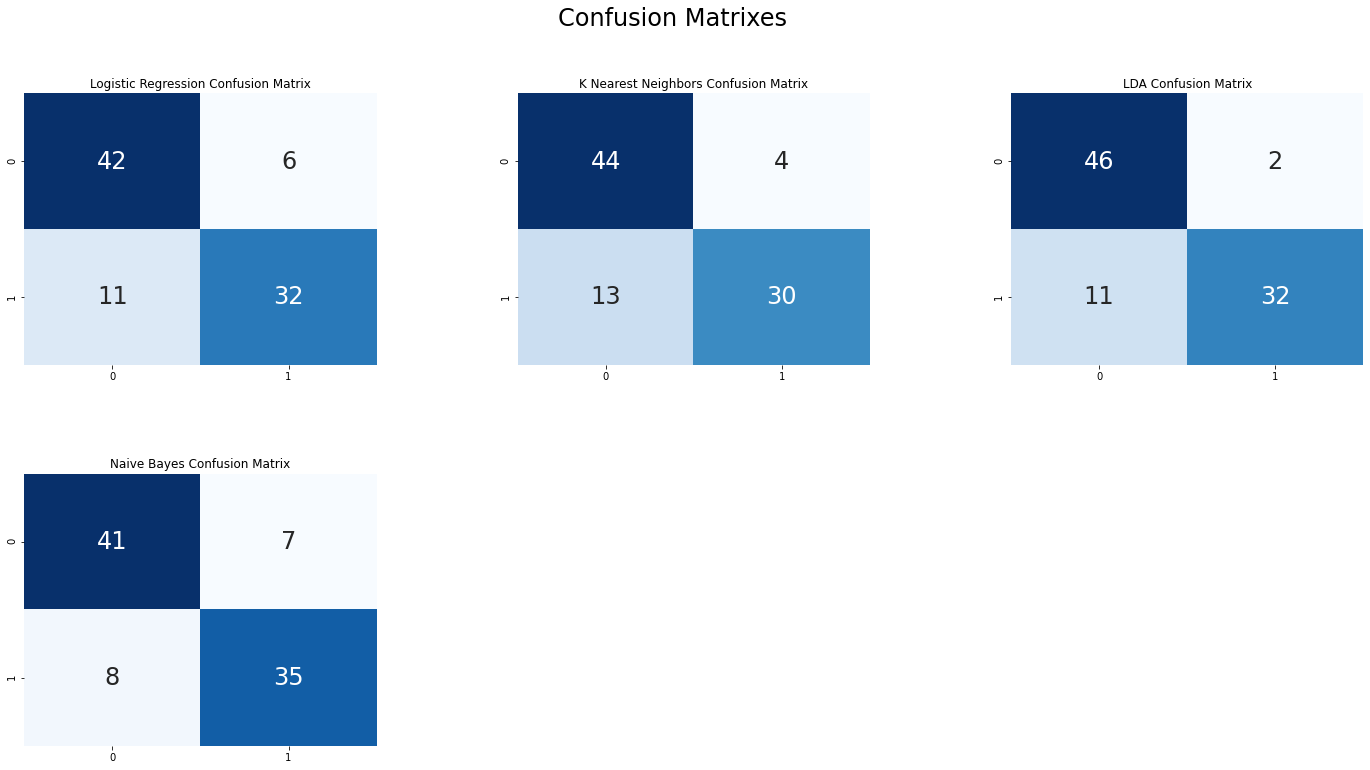

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("LDA Confusion Matrix")
sns.heatmap(cm_lda,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()